In [2]:
%%!
pip install wget

['Collecting wget',
 '  Downloading wget-3.2.zip (10 kB)',
 'Installing collected packages: wget',
 '    Running setup.py install for wget: started',
 "    Running setup.py install for wget: finished with status 'done'",
 'Successfully installed wget-3.2',
 'WARNING: You are using pip version 20.0.2; however, version 20.1.1 is available.',
 "You should consider upgrading via the 'c:\\osgeo4~1\\bin\\python3.exe -m pip install --upgrade pip' command."]

In [3]:
%%!
pip install plotly

['Requirement already satisfied: plotly in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (3.3.0)',
 'Requirement already satisfied: nbformat>=4.2 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (4.4.0)',
 'Requirement already satisfied: six in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (1.14.0)',
 'Requirement already satisfied: requests in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (2.22.0)',
 'Requirement already satisfied: pytz in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (2019.3)',
 'Requirement already satisfied: decorator>=4.0.6 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (4.4.1)',
 'Requirement already satisfied: retrying>=1.3.3 in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from plotly) (1.3.3)',
 'Requirement already satisfied: jupyter-core in c:\\osgeo4~1\\apps\\python37\\lib\\site-packages (from nbformat>=4.2->plotly) (4.6.3)',
 'Requirement already satisfied: jsonsc

In [2]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
from qgis.core import *
from qgis.gui import *
from qgis import processing
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice
from IPython.display import Image
from datetime import date
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import csv
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

Application state:
QGIS_PREFIX_PATH env var:		C:/OSGEO4~1/apps/qgis
Prefix:		C:/OSGEO4~1/apps/qgis
Plugin Path:		C:/OSGEO4~1/apps/qgis/plugins
Package Data Path:	C:/OSGEO4~1/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/OSGEO4~1/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/OSGEO4~1/apps/qgis/./svg/
		C:/Users/ASUS/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/OSGEO4~1/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/ASUS/AppData/Roaming/python3\profiles\default/qgis-auth.db



state
Alaska                    80136
Arizona                  517194
Arkansas                 190257
California              3990711
Colorado                 367133
Connecticut              297856
Delaware                  85598
District of Columbia      81114
Florida                 1766065
Georgia                 1596125
Hawaii                   210430
Idaho                    125006
Illinois                 893744
Indiana                  612001
Iowa                     283815
Kansas                   230432
Kentucky                 671288
Louisiana                560313
Maine                    125232
Maryland                 452380
Massachusetts            781110
Michigan                1330765
Minnesota                598819
Mississippi              220763
Missouri                 504424
Montana                   94122
Nebraska                 110764
Nevada                   414938
New Hampshire            172481
New Jersey               977969
New Mexico               133644
Ne

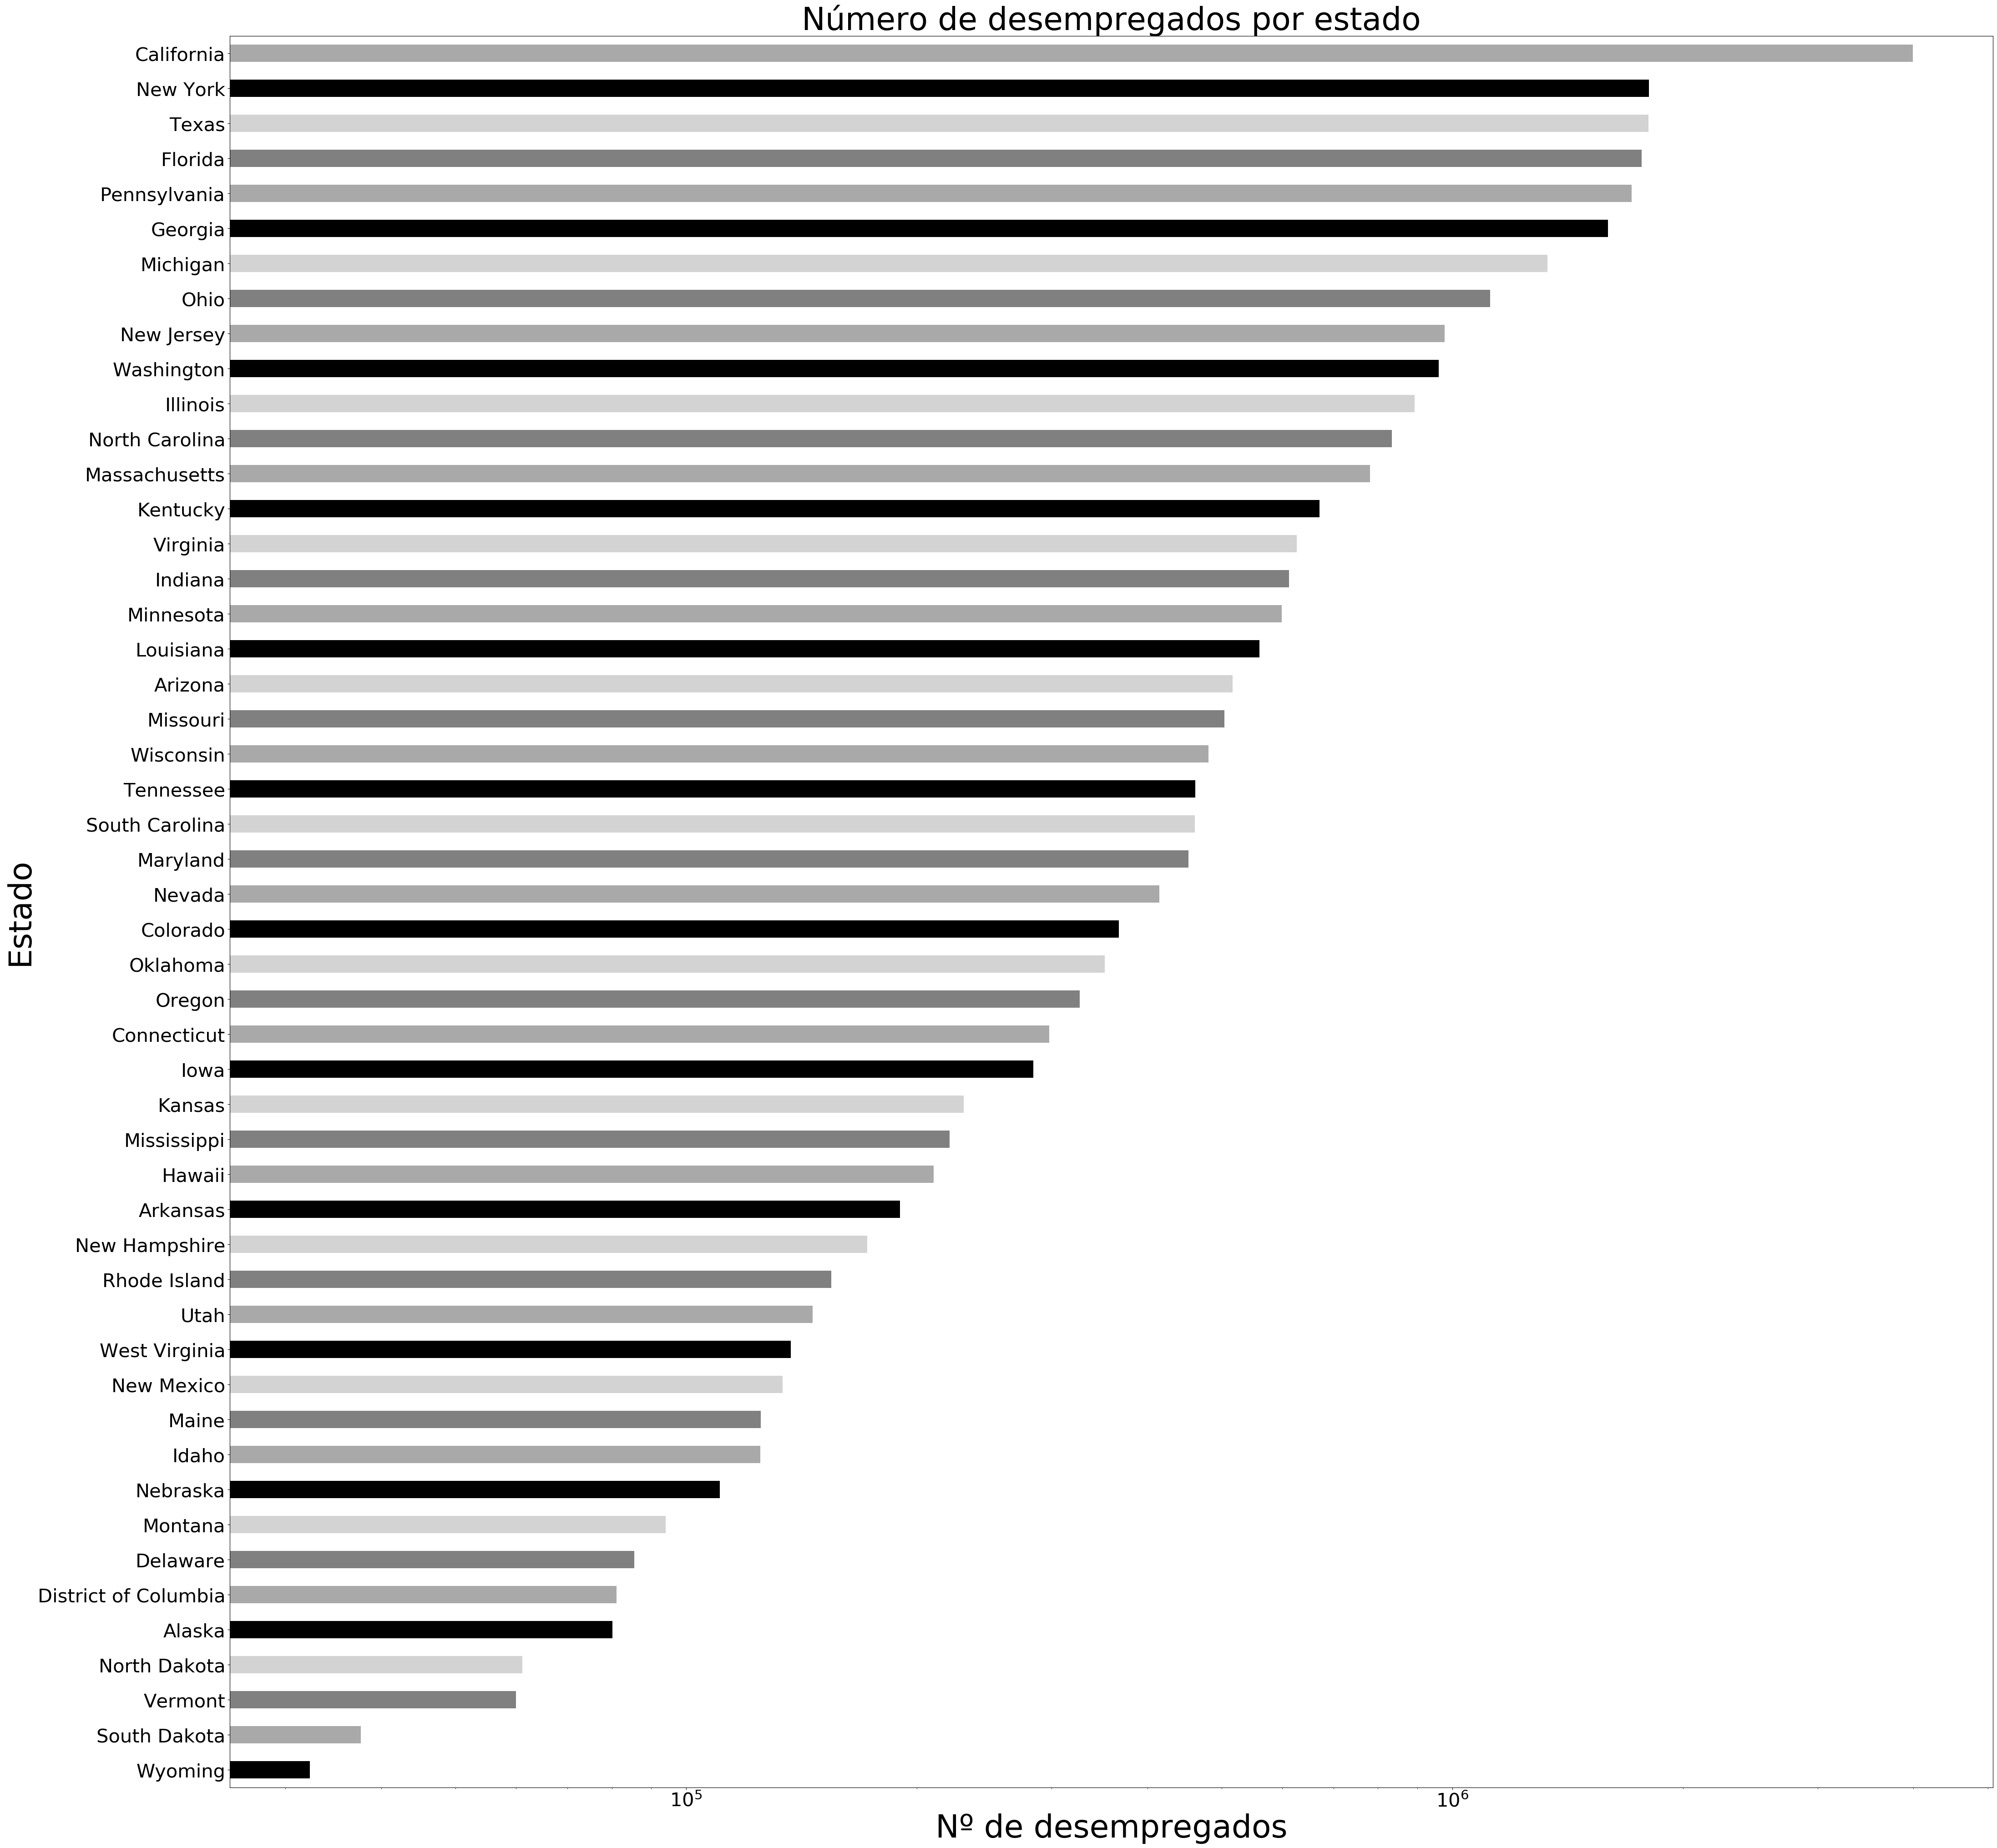

In [16]:
#grafico
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')

#plt.title('Estados com maior número de desempregados', weight='bold', size=12)

#import data
data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/state_job_loss.csv", encoding='utf-8', skiprows=[1])


data = data.groupby(['state']).sum().reset_index()
data.set_index("state", inplace=True)


length = len(data.columns.tolist())
confirmados = data.columns.tolist()[0]


conf = data[confirmados]
print(conf)
conf = conf.sort_values(ascending=True)

conf.plot.barh(figsize=(50,50),fontsize=30, color=['black', 'darkgrey', 'grey' , 'lightgrey'])
plt.xscale("log")
plt.ylabel('Estado', fontsize=50)
plt.xlabel('Nº de desempregados', fontsize=50)
plt.title('Número de desempregados por estado', fontsize=50)
plt.savefig('Figuras/desempregadoslog.jpg', bbox_inches='tight')
plt.show()



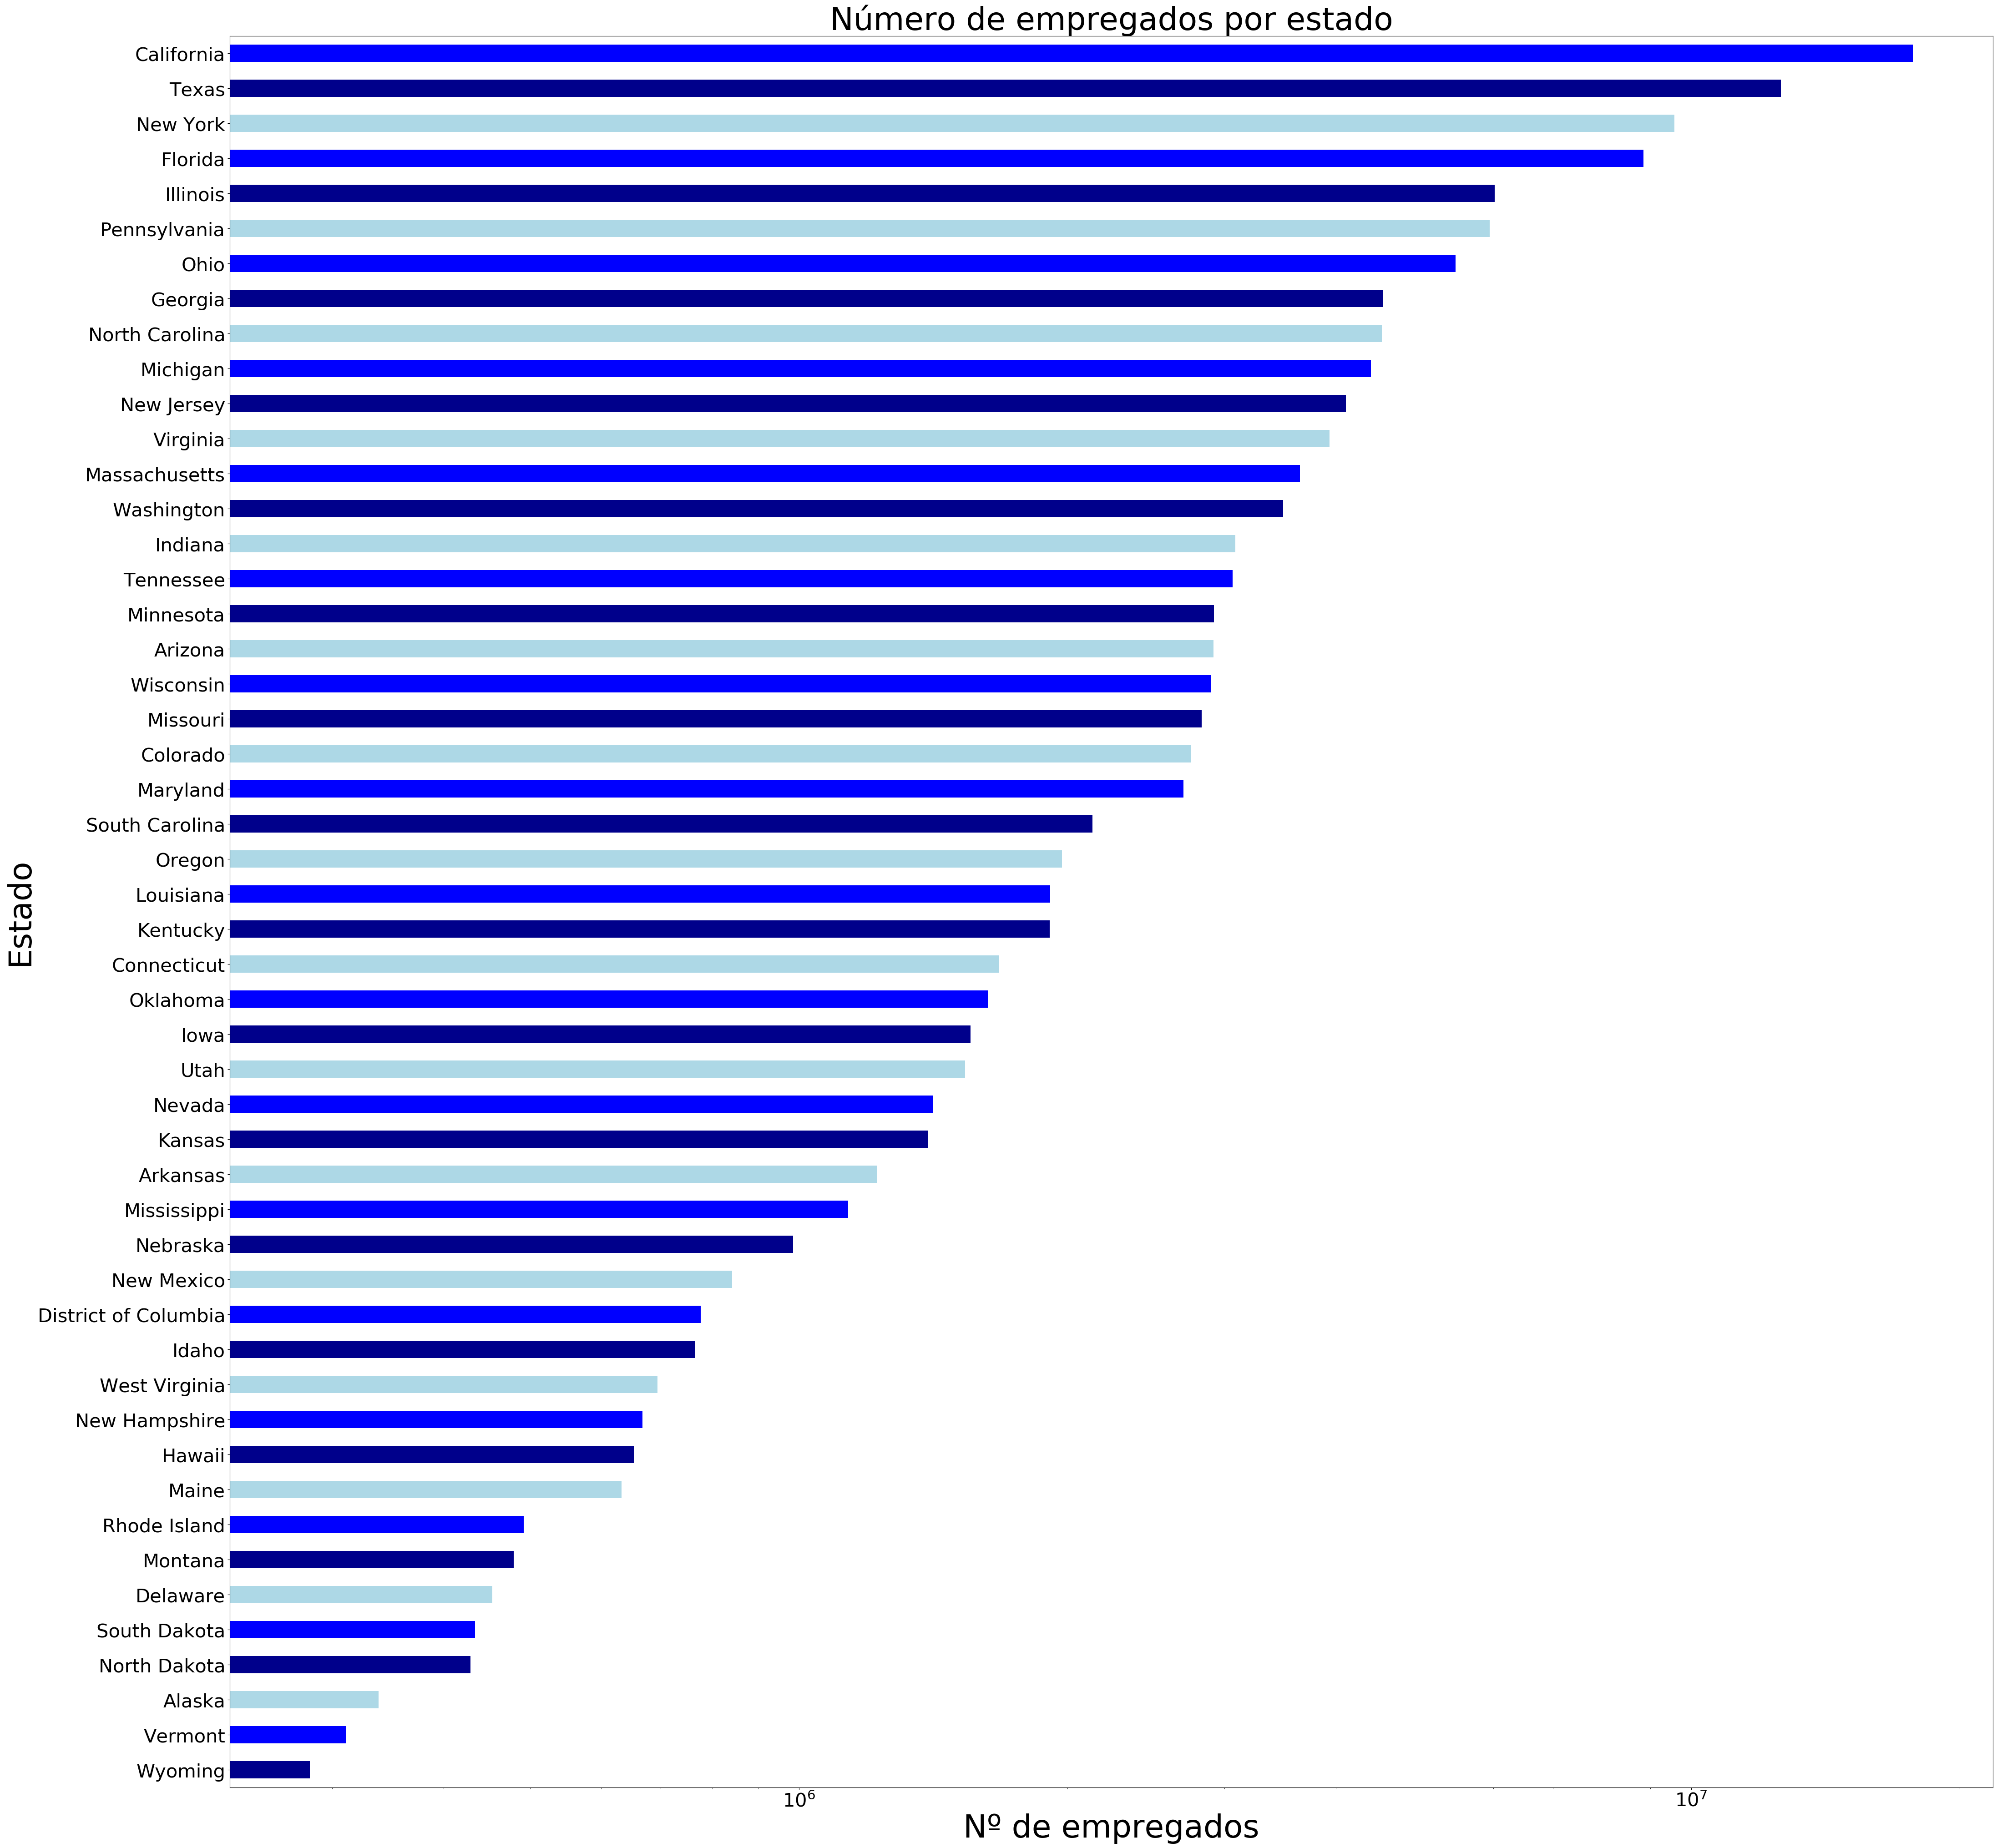

In [12]:
#grafico
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')

#plt.title('Estados com maior número de desempregados', weight='bold', size=12)

#import data
data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/state_job_loss.csv", encoding='utf-8', skiprows=[1])


data = data.groupby(['state']).sum().reset_index()
data.set_index("state", inplace=True)


length = len(data.columns.tolist())
confirmados = data.columns.tolist()[1]


conf = data[confirmados]

conf = conf.sort_values(ascending=True)

conf.plot.barh(figsize=(50,50),fontsize=30, color=['darkblue', 'blue', 'lightblue'])
plt.xscale("log")
plt.ylabel('Estado', fontsize=50)
plt.xlabel('Nº de empregados', fontsize=50)
plt.title('Número de empregados por estado', fontsize=50)
plt.savefig('Figuras/empregadoslog.jpg', bbox_inches='tight')
plt.show()


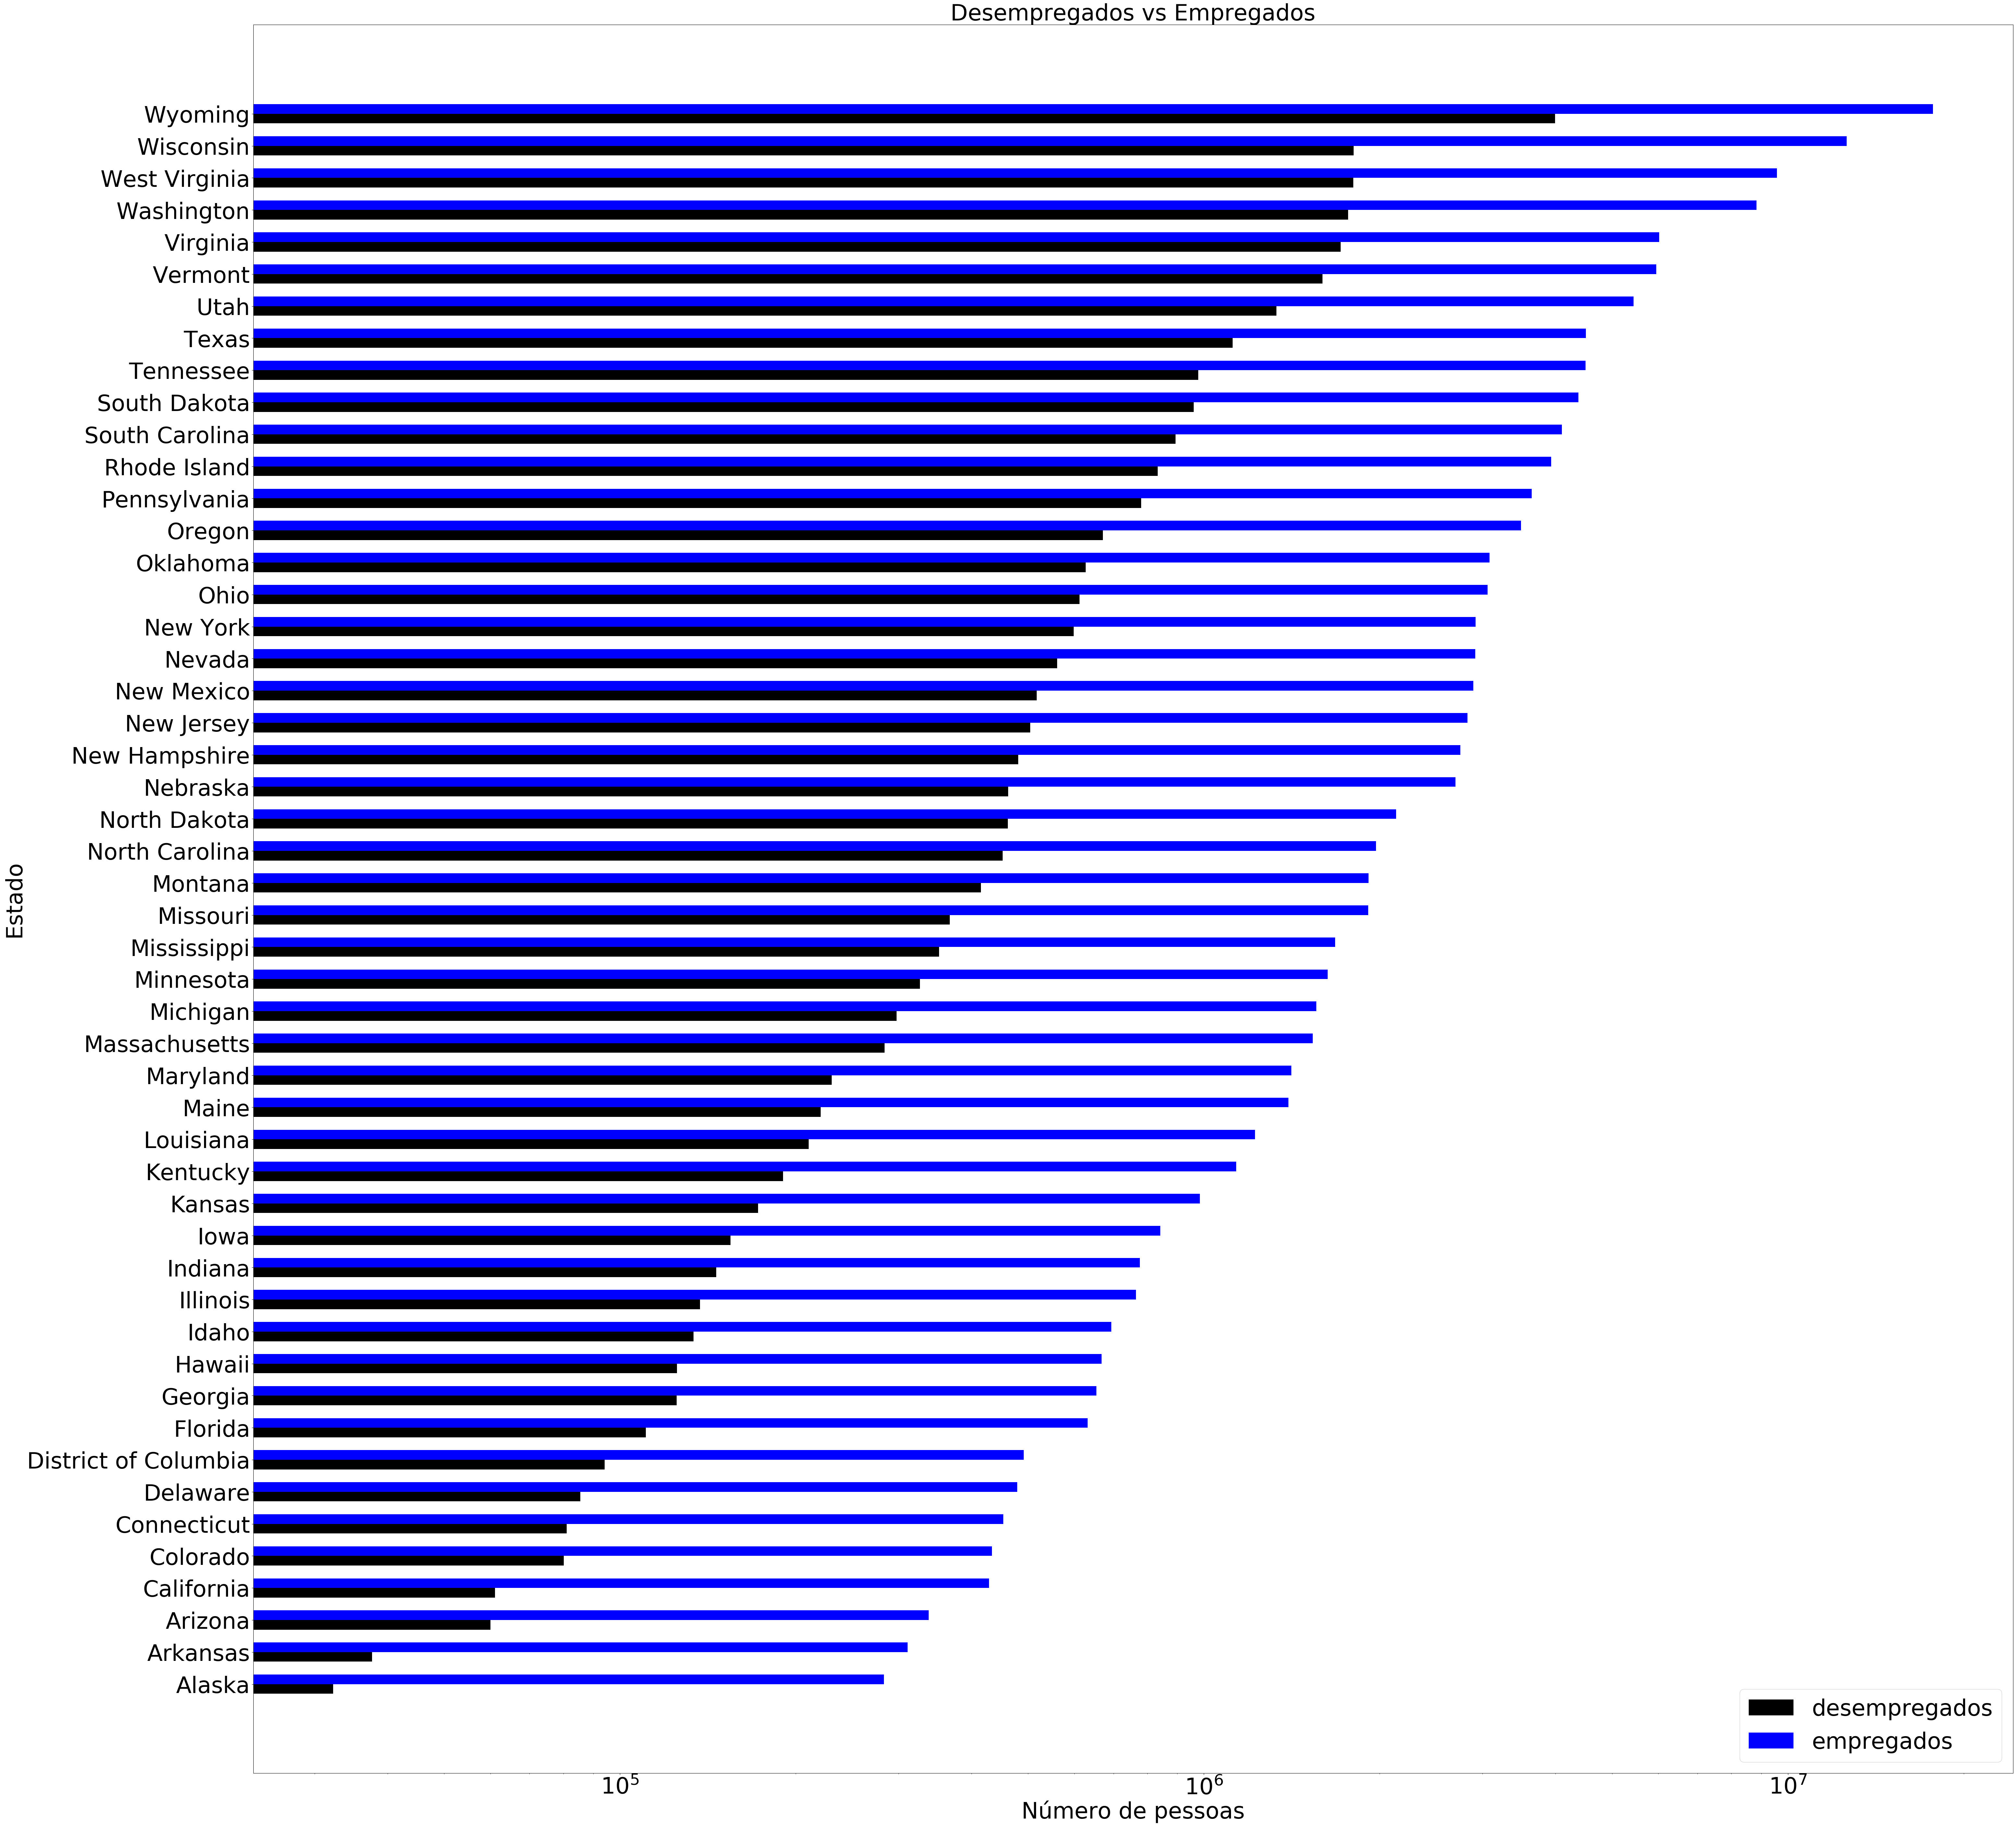

In [15]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')
data = pd.read_csv("C:/Users/ASUS/Desktop/Trabalho_SIG/US/state_job_loss.csv", encoding='utf-8', skiprows=[1])
data1 = data['unemployment_totals'].sort_values(ascending=True)
data2 = data['total_employment'].sort_values(ascending=True)
state = data['state']

fig, ax = plt.subplots(figsize=(70, 70))
x=np.arange(len(data1))

width = 0.30
ax.barh(x - width/2, data1, width, label='desempregados', color='black')
ax.barh(x + width/2, data2, width, label='empregados', color='blue')
#plt.figure(figsize=(50,50))
#plt.figure.tight_layout()
plt.title("Desempregados vs Empregados", fontsize=50)
plt.xscale("log")
plt.xticks(fontsize=50)
plt.yticks(x, state, fontsize=50)
plt.ylabel('Estado', fontsize=50)
plt.xlabel('Número de pessoas', fontsize=50)
plt.legend(fontsize=50)
plt.savefig('Figuras/empregadosvsdesempregados.jpg', bbox_inches='tight')
plt.show()
    